<a href="https://colab.research.google.com/github/Ibraheem101/tensorflow/blob/main/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews
### Dataset imdb dataset from keras.datasets
### Metric: Accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Add more data from test set to training set to reduce overfitting
X_append = test_data[:15000]
y_append = test_labels[:15000]

In [7]:
train_data = np.append(train_data, X_append)
train_labels = np.append(train_labels, y_append)

In [8]:
len(train_data), len(train_labels)

(40000, 40000)

In [9]:
test_data = test_data[15000:]
test_labels = test_labels[15000:]

In [10]:
len(test_data), len(test_labels)

(10000, 10000)

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[8]])

In [12]:
decoded_review

"? just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and ? lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens ? ? did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the concept you might get the feeling that this is one of those ? movies about an amazing triumph covered with over the top music and trying to have us fully convinced of what a great story it is telling but then not letting us in ? this is not that movie the people tell the story this does such a good job of capturing every moment of their involvement while we enter their world and feel every second with them there is so much beyond the climb that makes everything they go through so much more tense touching the void was also a great doc about mountain climbing and showing the i

In [13]:
len(decoded_review), len(train_data[8])

(1172, 233)

In [14]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [15]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [16]:
len(X_train[0]), len(train_data[0])

(10000, 218)

In [17]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [18]:
len(y_test)

10000

In [19]:
# Dev set
X_val = X_test[:5000]
y_val = y_test[:5000]

X_test = X_test[5000:10000]
y_test = y_test[5000:10000]

In [20]:
len(X_val), len(X_test)

(5000, 5000)

In [45]:
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [46]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [47]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta = 0.01,  patience=1)
history = model.fit(X_train, y_train, batch_size = 1, epochs = 10, validation_data = (X_val, y_val), callbacks = callback)

Epoch 1/10
40000/40000 [==============================] - 89s 2ms/step - loss: 0.3653 - accuracy: 0.8731 - val_loss: 0.2954 - val_accuracy: 0.8998
Epoch 2/10
40000/40000 [==============================] - 87s 2ms/step - loss: 0.3119 - accuracy: 0.8984 - val_loss: 0.2976 - val_accuracy: 0.9014
Epoch 3/10
40000/40000 [==============================] - 95s 2ms/step - loss: 0.3049 - accuracy: 0.9024 - val_loss: 0.2946 - val_accuracy: 0.9012


In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
len(history_dict['accuracy'])

3

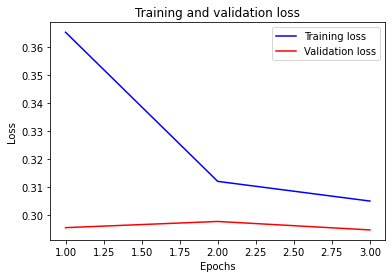

In [50]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len((history_dict['accuracy'])) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

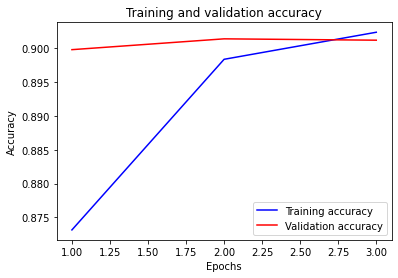

In [51]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len((history_dict['accuracy'])) + 1)
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 1s 5ms/step - loss: 0.3207 - accuracy: 0.8948


[0.3207454979419708, 0.8948000073432922]

In [57]:
y_prob = model.predict(X_test)

In [58]:
y_prob

array([[1.2293494e-05],
       [5.6013465e-04],
       [9.9887252e-01],
       ...,
       [1.7761141e-02],
       [1.3209373e-02],
       [4.3518931e-01]], dtype=float32)

In [59]:
y_pred = (y_prob > 0.5).astype(np.float32)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

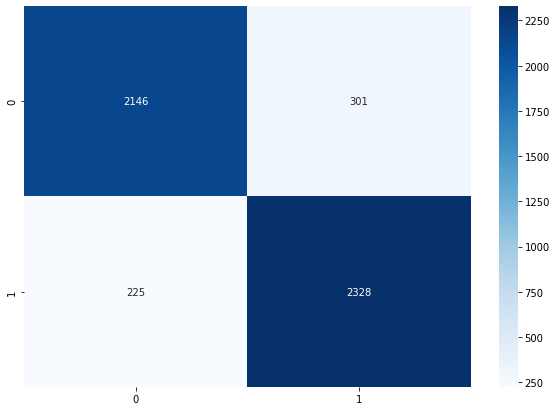

In [66]:
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', fmt='g')

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      2447
         1.0       0.89      0.91      0.90      2553

    accuracy                           0.89      5000
   macro avg       0.90      0.89      0.89      5000
weighted avg       0.90      0.89      0.89      5000

